# Ridge StandardScaler Grid model

#### 1. 준비

In [1]:
# 관련 라이브러리 및 모듈 Import
# import
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'mse- {mse:.3f}')
    print(f'rmse- {rmse:.3f}')
    print(f'r2- {r2:.3f}')
    
    return

### 데이터 수집, 탐색, 준비

####  데이터셋에 대한 설명 및 정보 확인

In [4]:
# 데이터 csv 불러오기
train = pd.read_csv('./train5.csv')

In [5]:
# X(독립변수), Y(종속변수) 분할
X = train.drop('match', axis=1)
y = train['match']
# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 릿지 모델 scaling, GridSerchCV

In [6]:
# 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 탐색할 하이퍼파라미터 값 지정
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 150]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 모델 선택
best_model = grid_search.best_estimator_

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 릿지 선형회귀 모델 평가
y_pred = best_model.predict(X_test)
y_pred[y_pred < 0] = 0.

evaluate_score(y_test, y_pred)

Best Parameters:  {'ridge__alpha': 150}
mse- 456.175
rmse- 21.358
r2- 0.199


In [7]:
# 릿지모델 회귀 계수
ridge_coef = pd.Series(best_model.named_steps['ridge'].coef_, index=X.columns)
ridge_coef

gender        0.799671
attr_s        0.787647
sinc_s        0.564436
intel_s       0.349439
fun_s         0.916441
amb_s         0.696083
attr_eval     2.761192
sinc_eval     0.475523
intel_eval    0.149823
fun_eval      0.665986
amb_eval      0.705265
shar_eval     2.989950
like_eval     1.906061
dtype: float64

### 계수 시각화

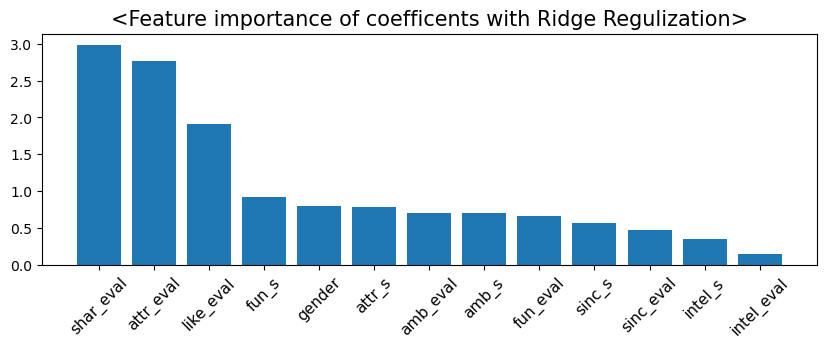

In [8]:
coef = np.abs(ridge_coef)
coef = pd.Series(coef, index=X.columns).sort_values(ascending=False)
coef
# 시각화
plt.figure(figsize=(10,3))
plt.title('<Feature importance of coefficents with Ridge Regulization>', fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

##### 독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포 차이를 그린다.
- 실제값과 예측값이 같을수록 x,y가 같은 곳을 찍어서 y = x 그래프를 그리게 될 것이다.

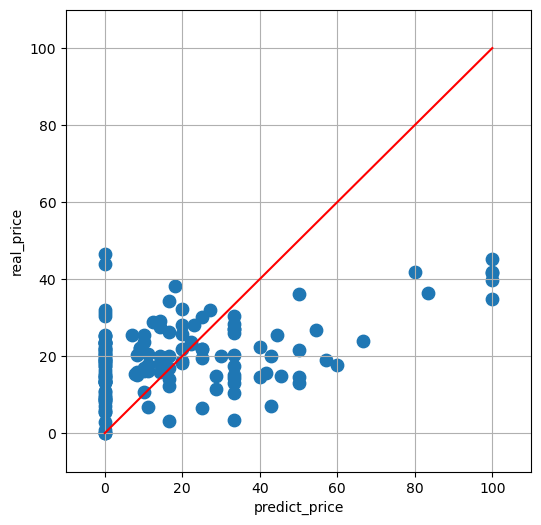

In [9]:
plt.figure(figsize = (6,6))
plt.scatter(y_test,y_pred,s = 80)
plt.grid()
plt.ylabel('real_price')
plt.xlabel('predict_price')
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.plot([0,100],[0,100],c = 'r')
plt.show()

### 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

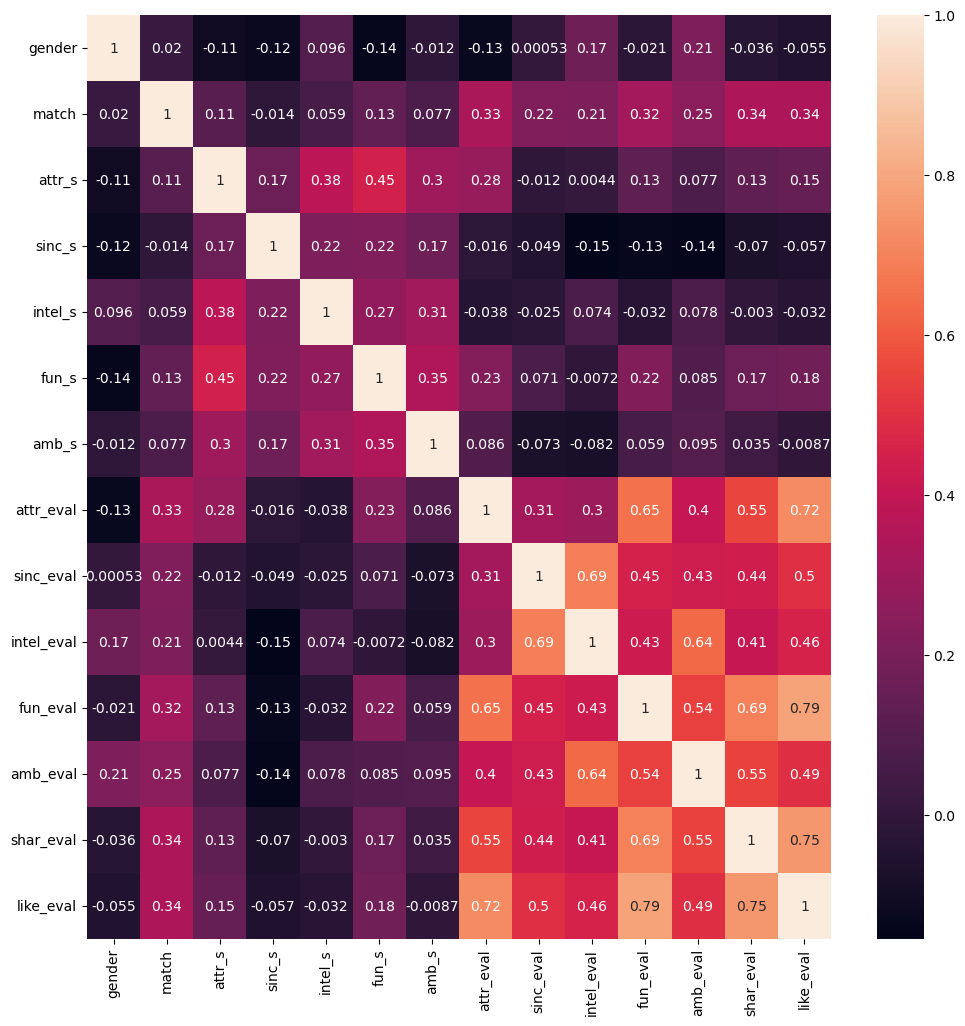

In [10]:
# 상관계수를 구하여 저장
corr_df = train.corr()
corr_df.corr()

# 상관계수를 히트맵으로 시각화
import seaborn as sns
plt.figure(figsize = (12,12))
sns.heatmap(corr_df, annot=True);

### 예측값

In [11]:
y_pred

array([18.18755749, 14.76219488, 14.53809721, 30.3529291 , 16.81589692,
       39.66864972, 20.5720437 , 19.87038645, 36.00046251, 25.41964842,
        6.59196485, 10.79920029, 29.04731928, 22.01238527, 20.12650838,
        7.11347183,  0.        , 25.35985785, 23.23248934, 11.49600694,
       17.57897803, 45.2804151 , 27.59840093, 10.4715403 , 18.15138863,
       20.03330643, 46.41154876, 14.71232237, 21.78470892, 20.83451725,
       12.93659015, 38.24884025, 27.026699  , 21.84551335, 22.19219258,
        8.57014203, 12.29451623, 27.9462532 , 23.63676969,  9.46307049,
       28.42966625,  8.63571546,  8.73477213, 26.29562481, 28.98197987,
       15.19377346,  6.01598757, 20.04244266, 21.93425114, 28.1689748 ,
       17.40515134, 20.24163653, 16.14868064, 26.75761654,  5.36250954,
       20.40589445, 14.57809655, 17.48613684, 20.31968506,  0.        ,
       19.41653605, 17.58719956, 14.05900215, 14.44248284, 23.33520011,
       31.89861243, 23.71758161,  9.84154229, 30.5136169 , 19.32